In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
df = pd.read_csv("D:\TaiLieu\KhaiPhaDuLieu\BaiTapLon\TapDuLieu\diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [23]:
df.drop_duplicates(inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [15]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
df["gender"] = le.fit_transform(df['gender'])
df["smoking_history"] = le.fit_transform(df['smoking_history'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [25]:
df['age'] = pd.cut(df['age'], bins = [0, 15, 65, 100], labels = [0, 1, 2])
df['bmi'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 35, float('inf')], labels=[0, 1, 2, 3, 4])
df['HbA1c_level'] = pd.cut(df['HbA1c_level'], bins=[0, 5.7, 6.5, float('inf')], labels=[0, 1, 2])
df['blood_glucose_level'] = pd.cut(df['blood_glucose_level'], bins=[0, 100, 126, float('inf')], labels=[0, 1, 2])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,2,0,1,4,2,2,2,0
1,0,1,0,0,0,2,2,0,0
2,1,1,0,0,4,2,0,2,0
3,0,1,0,0,1,1,0,2,0
4,1,2,1,1,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...
99994,0,1,0,0,0,1,0,2,0
99996,0,0,0,0,0,0,1,0,0
99997,1,2,0,0,3,2,0,2,0
99998,0,1,0,0,4,4,0,0,0


In [26]:
X = df.iloc[:, 0:8]
Y = df.iloc[:, 8]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, Y_train)

In [10]:
from sklearn.metrics import classification_report

In [29]:
y_pred = gnb.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     26267
           1       0.45      0.54      0.49      2577

    accuracy                           0.90     28844
   macro avg       0.70      0.74      0.72     28844
weighted avg       0.91      0.90      0.90     28844



In [30]:
from sklearn.metrics import confusion_matrix , precision_score, accuracy_score , recall_score
print("Accuracy: " , accuracy_score(Y_test, y_pred))
print("Precision: " , precision_score(Y_test ,y_pred))
print("Recall: " , recall_score(Y_test , y_pred) )
matrix = confusion_matrix(Y_test , y_pred)
print("Confusion matrix: ")
print(matrix)

Accuracy:  0.8993898211066427
Precision:  0.4480664749121125
Recall:  0.5440434613892122
Confusion matrix: 
[[24540  1727]
 [ 1175  1402]]


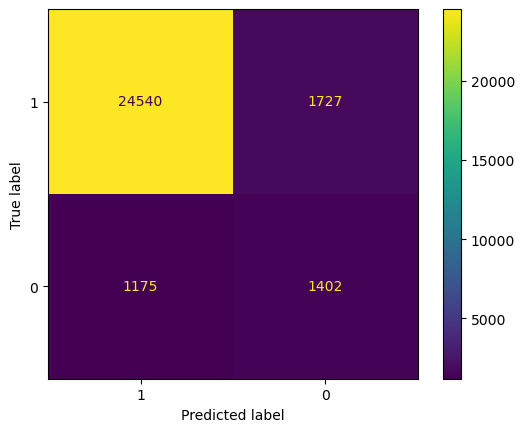

In [31]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["1", "0"])

cm_display.plot()
plt.show()